# Change of Primary Care Physician

An insurance provider (US based) offers health insurance to customers. The provider assigns a PCP(primary care physician) to each customer. The PCP addresses most health concerns of the customers assigned to them.  For various reasons, customers want change of PCP. It involves significant effort for the provider whenever the customer makes a change of PCP. 

You will find a subset of the insurance provider data along with PCP changes. The provider likes to understand why are members likely to leave the recommended provider. Further, they like to recommend a provider to them that they are less likely to leave.

## Import require modules

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

from sklearn import metrics

In [114]:
df = pd.read_csv("DataSet_PCP_Change.csv")

In [115]:
df.head()

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
0,0,0,0.071912,0,NaN,2.0,0,0,0,0,0,1,0,0
1,2,0,0.448447,0,NaN,1.0,0,0,1,1,1,0,0,0
2,5,0,0.345793,0,NaN,1.0,0,1,0,0,0,1,0,0
3,6,0,1.857032,0,NaN,1.0,0,0,1,1,1,1,0,0
4,7,1,7.222060,0,NaN,1.0,0,0,1,1,0,0,0,0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   testindex          3130 non-null   int64  
 1   outcome            3130 non-null   int64  
 2   distance           3130 non-null   float64
 3   visit_count        3130 non-null   int64  
 4   claims_daysaway    556 non-null    float64
 5   tier               3121 non-null   float64
 6   fqhc               3130 non-null   int64  
 7   pcp_lookback       3130 non-null   int64  
 8   family_assignment  3130 non-null   int64  
 9   kid                3130 non-null   int64  
 10  is_ped             3130 non-null   int64  
 11  same_gender        3130 non-null   int64  
 12  same_language      3130 non-null   int64  
 13  same_address       3130 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 342.5 KB


In [117]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,testindex,outcome,distance,visit_count,claims_daysaway,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
count,3130.000000,3130.000000,3130.000000,3130.000000,556.000000,3121.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000
mean,2519.981789,0.040575,2.851791,1.074121,135.330935,1.814803,0.192332,0.442173,0.341853,0.376997,0.392332,0.511821,0.064856,0.065495
std,1439.130702,0.197335,5.797008,3.160802,121.441560,0.991786,0.394196,0.496724,0.474406,0.484712,0.488348,0.499940,0.246311,0.247437
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1271.250000,0.000000,0.466053,0.000000,49.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2520.500000,0.000000,1.015903,0.000000,100.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,3769.750000,0.000000,2.195092,0.000000,185.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
90%,4515.100000,0.000000,7.031573,4.000000,291.500000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
95%,4750.550000,0.000000,11.860081,7.000000,401.250000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99%,4947.710000,1.000000,29.815444,14.710000,568.800000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
df.shape

(3130, 14)

<AxesSubplot:ylabel='distance'>

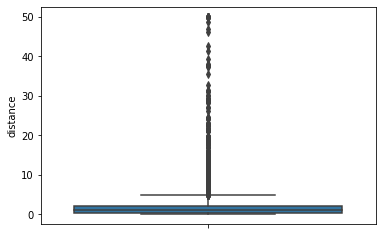

In [119]:
sns.boxplot(y = df['distance'])

In [120]:
Q1 = df['distance'].quantile(0.05)
Q3 = df['distance'].quantile(0.95)
IQR = Q3-Q1
print("shape :",df.shape)
df = df[(df.distance>= Q1-1.5*IQR) & (df.distance<= Q3+1.5*IQR)]
print("shape : ",df.shape)

shape : (3130, 14)
shape :  (3097, 14)


<AxesSubplot:ylabel='distance'>

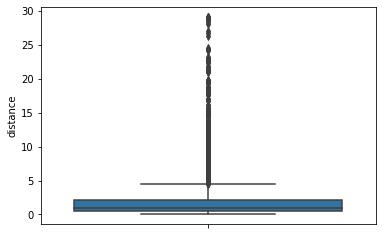

In [121]:
sns.boxplot(y = df['distance'])

<AxesSubplot:ylabel='visit_count'>

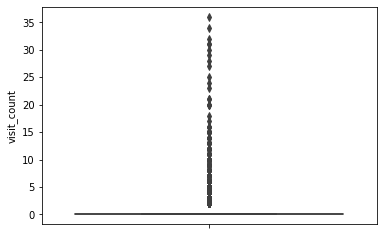

In [122]:
sns.boxplot(y = df['visit_count'])

In [123]:
Q1 = df['visit_count'].quantile(0.05)
Q3 = df['visit_count'].quantile(0.95)
IQR = Q3-Q1
print("shape :",df.shape)
df = df[(df.visit_count>= Q1-1.5*IQR) & (df.visit_count<= Q3+1.5*IQR)]
print("shape : ",df.shape)

shape : (3097, 14)
shape :  (3079, 14)


<AxesSubplot:ylabel='visit_count'>

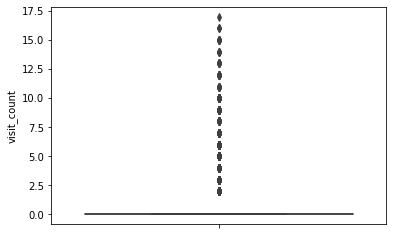

In [124]:
sns.boxplot(y = df['visit_count'])

In [125]:
df.isnull().sum()

testindex               0
outcome                 0
distance                0
visit_count             0
claims_daysaway      2552
tier                    9
fqhc                    0
pcp_lookback            0
family_assignment       0
kid                     0
is_ped                  0
same_gender             0
same_language           0
same_address            0
dtype: int64

In [126]:
df.dropna(subset=['tier'], inplace= True)

In [127]:
df.isnull().sum()

testindex               0
outcome                 0
distance                0
visit_count             0
claims_daysaway      2546
tier                    0
fqhc                    0
pcp_lookback            0
family_assignment       0
kid                     0
is_ped                  0
same_gender             0
same_language           0
same_address            0
dtype: int64

In [128]:
# having more null values, droping of 'claims_daysaway' columns
df.drop(['claims_daysaway'], axis=1, inplace= True)

In [129]:
df.head()

,testindex,outcome,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
0,0,0,0.071912,0,2.0,0,0,0,0,0,1,0,0
1,2,0,0.448447,0,1.0,0,0,1,1,1,0,0,0
2,5,0,0.345793,0,1.0,0,1,0,0,0,1,0,0
3,6,0,1.857032,0,1.0,0,0,1,1,1,1,0,0
4,7,1,7.222060,0,1.0,0,0,1,1,0,0,0,0


In [130]:
df.corr()

,testindex,outcome,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
testindex,1.000000,-0.026759,0.020463,0.000947,0.013175,0.013367,0.005399,-0.004871,0.005314,0.006978,-0.009489,-0.015617,0.035854
outcome,-0.026759,1.000000,0.087913,0.079740,0.009497,-0.036223,-0.080763,0.016145,0.045997,0.000790,0.000404,-0.032931,0.088038
distance,0.020463,0.087913,1.000000,0.064185,0.059318,-0.071265,0.166895,0.051340,0.059851,0.041664,0.021814,-0.015738,0.013349
visit_count,0.000947,0.079740,0.064185,1.000000,0.053391,-0.116720,0.255880,0.127605,0.109739,0.089603,0.036374,-0.022054,0.022203
tier,0.013175,0.009497,0.059318,0.053391,1.000000,-0.154486,0.078231,0.015586,-0.015117,-0.029170,0.011533,-0.046436,0.052708
fqhc,0.013367,-0.036223,-0.071265,-0.116720,-0.154486,1.000000,-0.115397,-0.079254,-0.040312,-0.045571,0.005236,0.037538,0.048609
pcp_lookback,0.005399,-0.080763,0.166895,0.255880,0.078231,-0.115397,1.000000,0.086117,0.092086,0.083016,0.013384,-0.018814,0.102317
family_assignment,-0.004871,0.016145,0.051340,0.127605,0.015586,-0.079254,0.086117,1.000000,0.310442,0.293631,-0.026755,0.033105,0.010650
kid,0.005314,0.045997,0.059851,0.109739,-0.015117,-0.040312,0.092086,0.310442,1.000000,0.880381,-0.018434,-0.016722,-0.019676
is_ped,0.006978,0.000790,0.041664,0.089603,-0.029170,-0.045571,0.083016,0.293631,0.880381,1.000000,-0.005089,0.009303,-0.012760


<AxesSubplot:>

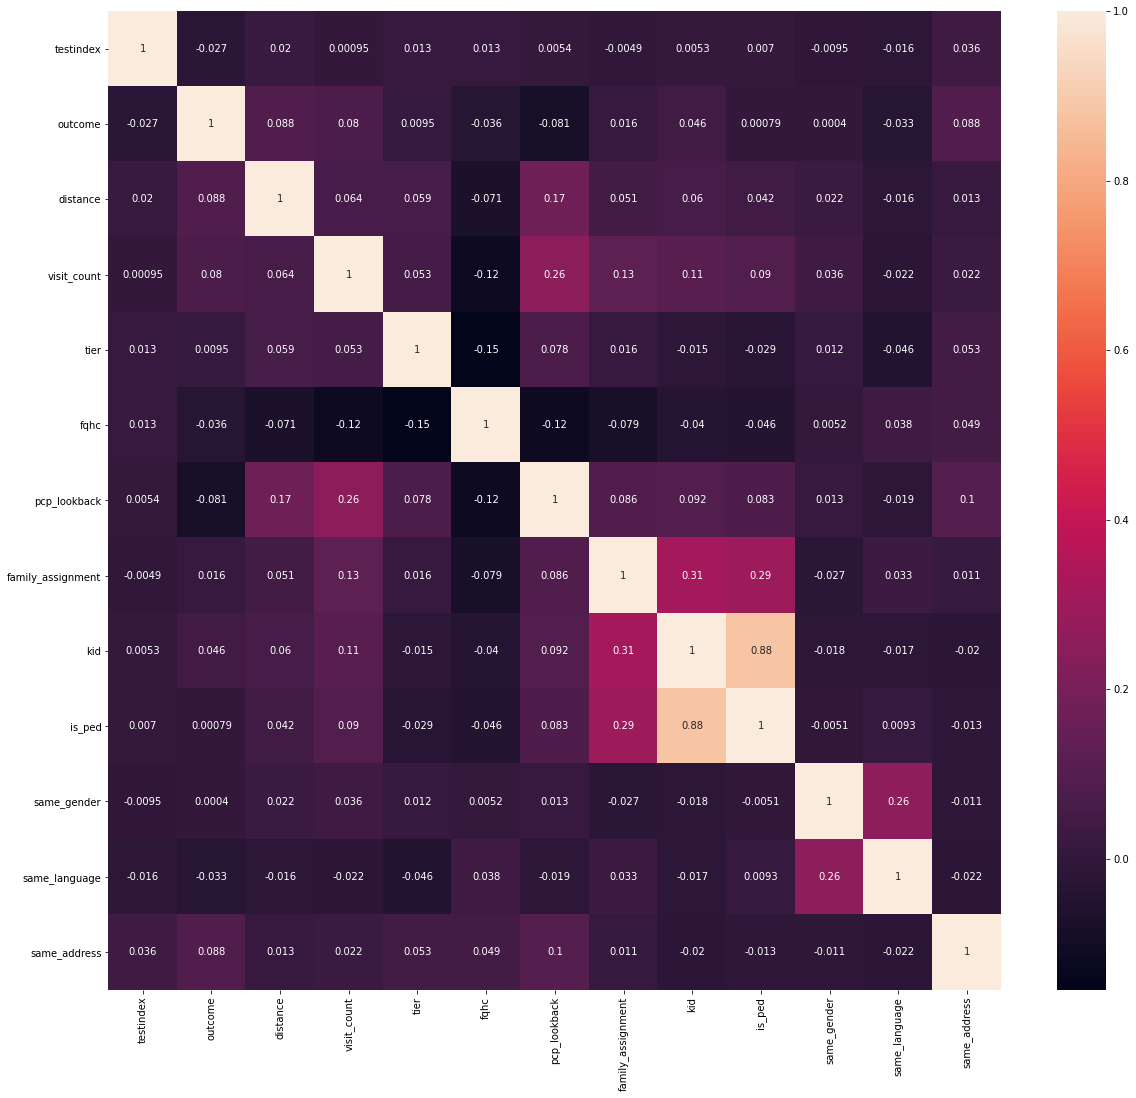

In [131]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(), annot=True)

In [132]:
x = df.drop(['outcome', 'testindex'], axis=1)
y = df['outcome']

In [133]:
x_train, x_test, y_train,y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [134]:
x_train.head()

,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
1221,1.428178,0,1.0,1,0,0,0,0,0,0,0
649,0.749095,0,3.0,0,0,0,0,0,1,0,0
1661,2.449499,0,1.0,0,1,0,1,1,0,0,0
2389,0.559509,2,1.0,0,1,0,0,0,0,0,0
3062,2.211284,0,3.0,0,0,0,0,0,1,0,0


## Scaling numerical freatures

In [135]:
scaller = StandardScaler()
x_train[['distance','visit_count','tier']] = scaller.fit_transform(x_train[['distance','visit_count','tier']])
x_train.head()

<ipython-input-135-6dd5fad0865b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[['distance','visit_count','tier']] = scaller.fit_transform(x_train[['distance','visit_count','tier']])
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
1221,-0.260415,-0.360784,-0.803493,1,0,0,0,0,0,0,0
649,-0.425427,-0.360784,1.223158,0,0,0,0,0,1,0,0
1661,-0.012243,-0.360784,-0.803493,0,1,0,1,1,0,0,0
2389,-0.471495,0.460100,-0.803493,0,1,0,0,0,0,0,0
3062,-0.070127,-0.360784,1.223158,0,0,0,0,0,1,0,0


## Model Building

In [136]:
# Logistic regression model
x_train_sm = sm.add_constant(x_train)
lm = sm.GLS(y_train, x_train_sm).fit()   
print(lm.summary())


                            GLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.045
Model:                            GLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     9.215
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.52e-16
Time:                        22:43:54   Log-Likelihood:                 514.61
No. Observations:                2149   AIC:                            -1005.
Df Residuals:                    2137   BIC:                            -937.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0609      0.00

In [137]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,is_ped,6.75
6,kid,6.72
8,same_gender,1.69
4,pcp_lookback,1.65
5,family_assignment,1.58
3,fqhc,1.21
9,same_language,1.17
10,same_address,1.09
1,visit_count,1.06
2,tier,1.04


In [138]:
col = x_train.columns

In [139]:
# tier has  0.992 more then 0.05 p-value, hance droping 'tier' column
col = col.drop('tier',1)

In [140]:
x_train_sm = sm.add_constant(x_train[col])
lm = sm.GLS(y_train, x_train_sm).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.045
Model:                            GLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           7.65e-17
Time:                        22:44:11   Log-Likelihood:                 514.61
No. Observations:                2149   AIC:                            -1007.
Df Residuals:                    2138   BIC:                            -944.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0609      0.00

In [141]:
# family_assignment has 0.822 more then 0.05 p-value, hance droping 'family_assignment' column
col = col.drop('family_assignment',1)

In [142]:
x_train_sm = sm.add_constant(x_train[col])
lm = sm.GLS(y_train, x_train_sm).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.045
Model:                            GLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     11.27
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           2.25e-17
Time:                        22:44:12   Log-Likelihood:                 514.58
No. Observations:                2149   AIC:                            -1009.
Df Residuals:                    2139   BIC:                            -952.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0604      0.008      7.501

In [143]:
# same_gender has 0.782 more then 0.05 p-value, hance droping 'same_gender' column
col = col.drop('same_gender',1)

In [144]:
x_train_sm = sm.add_constant(x_train[col])
lm = sm.GLS(y_train, x_train_sm).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.045
Model:                            GLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     12.67
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           6.27e-18
Time:                        22:44:13   Log-Likelihood:                 514.54
No. Observations:                2149   AIC:                            -1011.
Df Residuals:                    2140   BIC:                            -960.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0615      0.007      8.808

In [145]:
# same_language has 0.228 more then 0.05 p-value, hance droping 'same_language' column
col = col.drop('same_language',1)

In [146]:
x_train_sm = sm.add_constant(x_train[col])
lm = sm.GLS(y_train, x_train_sm).fit()   
print(lm.summary())

                            GLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.045
Model:                            GLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     14.27
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           3.15e-18
Time:                        22:44:14   Log-Likelihood:                 513.81
No. Observations:                2149   AIC:                            -1012.
Df Residuals:                    2141   BIC:                            -966.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0601      0.007      8.726   

In [147]:
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,is_ped,6.60
4,kid,6.57
3,pcp_lookback,1.44
2,fqhc,1.13
6,same_address,1.08
1,visit_count,1.06
0,distance,1.03


All the p-values of above features are <=0.05

In [148]:
y_train_pred = lm.predict(x_train_sm)
y_train_pred[:10]

1221    0.023655
649     0.045526
1661    0.014806
2389    0.001732
3062    0.053364
1362   -0.006181
485     0.074106
1700    0.020592
2918    0.086432
1898    0.124650
dtype: float64

#### creating a data frame with the actual churn flag and the predicted probabilities

In [149]:
y_train_pred_final = pd.DataFrame({'outcome': y_train.values, 'outcome_prob': y_train_pred})
y_train_pred_final.head()

,outcome,outcome_prob
1221,1,0.023655
649,1,0.045526
1661,0,0.014806
2389,0,0.001732
3062,0,0.053364


In [150]:
y_train_pred_final['predicted'] = y_train_pred_final.outcome_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,outcome,outcome_prob,predicted
1221,1,0.023655,0
649,1,0.045526,0
1661,0,0.014806,0
2389,0,0.001732,0
3062,0,0.053364,0


In [151]:
y_train_pred_final['testindex'] = y_train.index
y_train_pred_final.head()

,outcome,outcome_prob,predicted,testindex
1221,1,0.023655,0,1221
649,1,0.045526,0,649
1661,0,0.014806,0,1661
2389,0,0.001732,0,2389
3062,0,0.053364,0,3062


In [152]:
#confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.outcome, y_train_pred_final.predicted)
confusion

array([[2064,    0],
       [  85,    0]], dtype=int64)

In [153]:
#lets check the accuracy of the model
print("Accuracy of the model: ",metrics.accuracy_score(y_train_pred_final.outcome, y_train_pred_final.predicted))

Accuracy of the model:  0.9604467194043741


In [154]:
# Metrics beyond simply accuracy

TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]


In [155]:
#lets check the Sensitivity of the our model
TP/float(TP+FN)

0.0

In [156]:
#lets check the Specificity of the our model
TN / float(TN+FP)

1.0

## Plotting ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [157]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

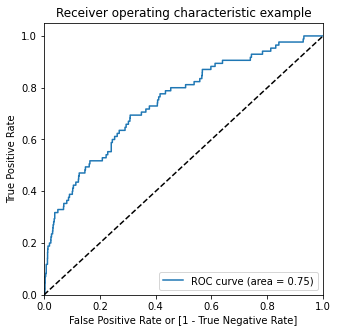

In [158]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.outcome, y_train_pred_final.outcome_prob, drop_intermediate = False )
draw_roc(y_train_pred_final.outcome, y_train_pred_final.outcome_prob)

## Finding optimal cutoff point

In [159]:
#lets create columsn with diffrent probability cutoffs
numbers = [float(i)/10 for i in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.outcome_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

,outcome,outcome_prob,predicted,testindex,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1221,1,0.023655,0,1221,1,0,0,0,0,0,0,0,0,0
649,1,0.045526,0,649,1,0,0,0,0,0,0,0,0,0
1661,0,0.014806,0,1661,1,0,0,0,0,0,0,0,0,0
2389,0,0.001732,0,2389,1,0,0,0,0,0,0,0,0,0
3062,0,0.053364,0,3062,1,0,0,0,0,0,0,0,0,0


In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [float(i)/10 for i in range(10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.outcome, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.194044  0.964706  0.162306
0.1   0.1  0.916240  0.329412  0.940407
0.2   0.2  0.958585  0.011765  0.997578
0.3   0.3  0.960447  0.000000  1.000000
0.4   0.4  0.960447  0.000000  1.000000
0.5   0.5  0.960447  0.000000  1.000000
0.6   0.6  0.960447  0.000000  1.000000
0.7   0.7  0.960447  0.000000  1.000000
0.8   0.8  0.960447  0.000000  1.000000
0.9   0.9  0.960447  0.000000  1.000000


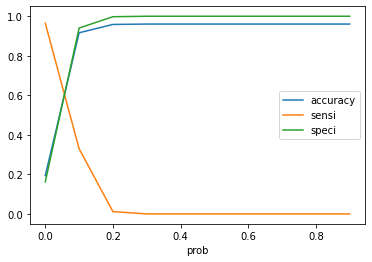

In [161]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [162]:
y_train_pred_final['final_predicted'] = y_train_pred_final.outcome_prob.map(lambda x: 1 if x>0.1 else 0)
y_train_pred_final.head()

,outcome,outcome_prob,predicted,testindex,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1221,1,0.023655,0,1221,1,0,0,0,0,0,0,0,0,0,0
649,1,0.045526,0,649,1,0,0,0,0,0,0,0,0,0,0
1661,0,0.014806,0,1661,1,0,0,0,0,0,0,0,0,0,0
2389,0,0.001732,0,2389,1,0,0,0,0,0,0,0,0,0,0
3062,0,0.053364,0,3062,1,0,0,0,0,0,0,0,0,0,0


In [163]:
#confusion matrix
confusion1 = metrics.confusion_matrix(y_train_pred_final.outcome, y_train_pred_final.final_predicted)
confusion1

array([[1941,  123],
       [  57,   28]], dtype=int64)

In [164]:
#lets check the accuracy of the model
print("Accuracy of the model: ",metrics.accuracy_score(y_train_pred_final.outcome, y_train_pred_final.final_predicted))

Accuracy of the model:  0.9162401116798511


## Making predictions on the test set

In [165]:
x_test[['distance','visit_count','tier']] = scaller.fit_transform(x_test[['distance','visit_count','tier']])
x_test.head()

<ipython-input-165-842a1b0df940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[['distance','visit_count','tier']] = scaller.fit_transform(x_test[['distance','visit_count','tier']])
C:\Users\rafisha.OT\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,distance,visit_count,tier,fqhc,pcp_lookback,family_assignment,kid,is_ped,same_gender,same_language,same_address
2400,-0.393889,-0.389354,2.140145,0,0,1,0,0,0,0,0
2406,-0.425299,-0.389354,-0.859967,0,0,1,0,0,1,0,0
243,-0.419386,5.043900,2.140145,0,0,1,1,1,1,0,0
595,-0.531325,-0.389354,-0.859967,1,1,0,0,0,0,0,0
1270,-0.409406,-0.389354,1.140107,0,1,0,1,1,0,0,1


In [166]:
col

Index(['distance', 'visit_count', 'fqhc', 'pcp_lookback', 'kid', 'is_ped',
       'same_address'],
      dtype='object')

In [167]:
x_test_sm = sm.add_constant(x_test[col])
y_test_pred = lm.predict(x_test_sm)
y_test_pred[:10]

2400    0.045807
2406    0.045114
243     0.138957
595    -0.037428
1270    0.064151
1892    0.059933
29      0.044066
2878    0.059022
1615    0.045556
3097    0.039456
dtype: float64

### creating a data frame with the actual churn flag and the predicted probabilities

In [168]:
y_test_pred_final = pd.DataFrame({'outcome': y_test.values, 'outcome_prob': y_test_pred})
y_test_pred_final.head()

,outcome,outcome_prob
2400,0,0.045807
2406,0,0.045114
243,0,0.138957
595,0,-0.037428
1270,0,0.064151


In [169]:
y_test_pred_final['predicted'] = y_test_pred_final.outcome_prob.map(lambda x: 1 if x>0.5 else 0)
y_test_pred_final.head()

,outcome,outcome_prob,predicted
2400,0,0.045807,0
2406,0,0.045114,0
243,0,0.138957,0
595,0,-0.037428,0
1270,0,0.064151,0


In [170]:
y_test_pred_final['testindex'] = y_test.index
y_test_pred_final.head()

,outcome,outcome_prob,predicted,testindex
2400,0,0.045807,0,2400
2406,0,0.045114,0,2406
243,0,0.138957,0,243
595,0,-0.037428,0,595
1270,0,0.064151,0,1270


In [171]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.outcome, y_test_pred_final.predicted)

0.9609120521172638

In [172]:
# Metrics beyond simply accuracy
#confusion matrix
confusion1 = metrics.confusion_matrix(y_test_pred_final.outcome, y_test_pred_final.predicted)

TP = confusion1[1,1]
TN = confusion1[0,0]
FP = confusion1[0,1]
FN = confusion1[1,0]


In [173]:
y_test_pred_final['final_predicted'] = y_test_pred_final.outcome_prob.map(lambda x: 1 if x>0.1 else 0)
y_test_pred_final.head()

,outcome,outcome_prob,predicted,testindex,final_predicted
2400,0,0.045807,0,2400,0
2406,0,0.045114,0,2406,0
243,0,0.138957,0,243,1
595,0,-0.037428,0,595,0
1270,0,0.064151,0,1270,0


In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.outcome, y_test_pred_final.final_predicted)

0.9185667752442996

In [175]:
#confusion matrix
confusion1 = metrics.confusion_matrix(y_test_pred_final.outcome, y_test_pred_final.predicted)

TP = confusion1[1,1]
TN = confusion1[0,0]
FP = confusion1[0,1]
FN = confusion1[1,0]

#lets check the Sensitivity of the our model
print("Sensitivity :",TP/float(TP+FN))

#lets check the Specificity of the our model
print("Specificity :",TN / float(TN+FP))

Sensitivity : 0.0
Specificity : 1.0


Below are list of freatures to predict correct Churn

* 0 - distance
* 1 - visit_count
* 2 - fqhc
* 3 - pcp_lookback
* 4 - kid
* 5 - is_ped
* 6 - same_address


Accuracy of model on train data  with cut off values 0.5 is =0.960 \
Accuracy of model on train data with cut off values 0.1 is =0.918 

Accuracy of model on test data  with cut off values 0.5 is =0.960\
Accuracy of model on test data with cut off values 0.1 is =0.918